**Problem Statement**

The Titanic dataset provides information on the face of the passengers on the Titanic, summerized according to economic status, sex, age and survival.

Our task is to predict the survival of the Titanic passengers

In [ ]:
#First import important libraries for model use and validation, and also the libraries used for metrics and reporting.
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
#Use the dot set property to set the style color code and font scale of the plot
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression #importing sklearn libraries are for logistic regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [ ]:
#Now load and read the dataset in pandas dataFrame
df_train = pd.read_csv("/train.csv")
df_train.shape#There are 891  rows along with 12 columns in the Titanic dataset

(891, 12)

In [ ]:
#To return the first 5 rows of data we use
df_train.Survived.value_counts()

#Here in o/p we notice that there were 342 passengers who servived and 549 passengers who didn't survive the crash.

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
df_train.Sex.value_counts()
#There are 577 males and 314 females on board

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
df_train.Embarked.value_counts()
#644 passengers boarded from the city of Couth Hampton, 168 from cherry Borg and 77 from Queenstown

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Now we need to check the missing values as they reduce the quality of our performance matrics
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

notice that Cabin has almost 80% missing values. we will drop that variable completely. Age seems like a relevant predictor for survival? Ww'd  want to keep the variables , bu it has 177 missing values. We need to find a way to approximate those missing values and drop variables that aren't relevant for predicting survival. We should atleast keep the following variables number survived. These variables are relevant.

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
#Now we need to deal with the missing values in the age of variable, let's now write a fxn to find each null value in the age variable
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
      # We will be assigning values based on the passenger class
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
df_train.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [ ]:
df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [ ]:
df_train_dummied = pd.get_dummies(df_train,columns=["Embarked"])

In [ ]:
#Converting the categorical variables into dummy slash indicator variables we get the following data frame 
df_train_dummied.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,1,0,7.2500,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,1
4,0,3,male,35.0,0,0,8.0500,0,0,1


<AxesSubplot:>

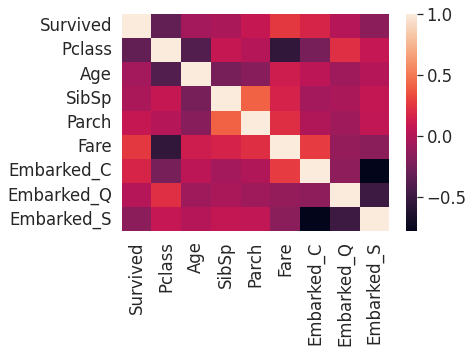

In [ ]:
#We also need to find out if variables are correlated, lets utilize tehe heat map to do this
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

Here we notice that there is a strong correlation between servival and sex_female variables. So we will build a classifier which can predict survival.

In [ ]:
used_features = ["Pclass","Age","SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"]
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 7)
(267, 7)
(622,)
(267,)


In [ ]:
LogReg = LogisticRegression()

In [ ]:
LogReg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = LogReg.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test,y_pred)

array([[140,  26],
       [ 53,  48]])

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.704119850187266

In [ ]:
len(X_test)

267

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       166
           1       0.65      0.48      0.55       101

    accuracy                           0.70       267
   macro avg       0.69      0.66      0.66       267
weighted avg       0.70      0.70      0.69       267



In [ ]:
LogReg.coef_

array([[-1.08308102, -0.04128713, -0.15204294,  0.33030591,  0.19925346,
         0.43025464, -0.57965649]])

In [ ]:
LogReg.intercept_

array([3.48732629])

In [ ]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
LogReg.predict_proba(X_test)

array([[0.67805091, 0.32194909],
       [0.72958989, 0.27041011],
       [0.91079295, 0.08920705],
       [0.49806406, 0.50193594],
       [0.73481595, 0.26518405],
       [0.44336996, 0.55663004],
       [0.74739024, 0.25260976],
       [0.67771523, 0.32228477],
       [0.52155702, 0.47844298],
       [0.80455946, 0.19544054],
       [0.59986827, 0.40013173],
       [0.49388174, 0.50611826],
       [0.61202186, 0.38797814],
       [0.35375382, 0.64624618],
       [0.77728084, 0.22271916],
       [0.77728084, 0.22271916],
       [0.8086447 , 0.1913553 ],
       [0.71299555, 0.28700445],
       [0.54945789, 0.45054211],
       [0.21493748, 0.78506252],
       [0.84060834, 0.15939166],
       [0.3640582 , 0.6359418 ],
       [0.75852222, 0.24147778],
       [0.70998981, 0.29001019],
       [0.3308616 , 0.6691384 ],
       [0.86636535, 0.13363465],
       [0.1662269 , 0.8337731 ],
       [0.78434639, 0.21565361],
       [0.81525242, 0.18474758],
       [0.57994637, 0.42005363],
       [0.

In [ ]:
#We started with the data exploration, performed missing data check, and learned which features are important
#We converted categorical features into numeric ones
#Finally, we built a classifier to preddict survival
#We also evaluated the model performance using the classification report

In [ ]:
#Now we need to deal with the missing values in the age of variable, let's now write a fxn to find each null value in the age variable
def age_approx(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):# We will be assigning values based on the passenger class
        if Pclass ==1:
            return 37
        if Pclass ==2:
            return 29
        else:
            return 24
    else:
        return age
        #Here i stuck in the error and in the cell where code is plt.figure(figsize=(6,4))
#sns.heatmap(df_train_dummied.corr()) male and female value on the plot are missing
#I am not able to find the error


In [ ]:
df_train.groupby(["Pclass"]).mean()

In [ ]:
df_train['age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)